# Improvement in sentiment score using Transformer Model

After a quick review of the scientific literature, we can learn that the state-of-the-art models for sentiment analysis are those based on a transform architecture such as the BERT model. Therefore, we propose to use a pre-trained then fine-tuned BERT model on a corpus of financial news to improve the computation of the sentiment score associated with each ECB statement. To do so we use the `mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis` from `HuggingFace` library

This model is based BERT (Bidirectional Encoder Representations from Transformers) is a pivotal model in the realm of natural language processing (NLP), and its innovation can be attributed to several key components, with the attention mechanism being a crucial aspect. Let's delve into its significance and the innovations behind it:

1. Pre-training and Fine-tuning:
Innovation: BERT introduced a two-step training process that leverages vast amounts of text data. First, the model is pre-trained on a large corpus of text using two unsupervised tasks: Masked Language Model (MLM) and Next Sentence Prediction (NSP). For example for the first task the model is trained to predict a word in the sentence given the context and meaning of the sentence .After pre-training, the model can be fine-tuned on specific downstream tasks, such as sentiment analysis or question-answering, with smaller, task-specific datasets. In our case the model we use is fine-tuned for the sentiement analysis task on a financial new dataset.

2. Bidirectional Context:
Innovation: Unlike previous models that processed text in a left-to-right or right-to-left manner, BERT utilizes a bidirectional approach. This means it considers the context from both directions (before and after a word) when encoding a word's representation. This bidirectional context helps in capturing a deeper understanding of words in their specific contexts.

3. Transformer Architecture:
Innovation: BERT is built upon the Transformer architecture, which was introduced in the paper "Attention Is All You Need" by Vaswani et al. (2017). The Transformer's core is the attention mechanism, which allows it to weigh the significance of different words in a sentence when processing each word. This attention mechanism replaces the recurrent layers used in previous models and offers more parallelizable computations, making it more efficient and effective for capturing long-range dependencies in text.

### Attention Mechanism in BERT

* **Self-Attention:** The attention mechanism in BERT allows the model to weigh the importance of different words (tokens) in a sequence when processing a particular word. This is termed as "self-attention" because it determines how much focus (attention weight) each word should give to every other word in the sequence.

* **Capturing Dependencies:** By employing self-attention, BERT can capture dependencies between words that are far apart in a sentence. For instance, in the sentence "The cat sat on the mat," understanding the relationship between "sat" and "mat" requires considering all the words in between, which self-attention can efficiently capture.

* **Multiple Layers and Heads:** BERT uses multiple attention layers (stacked on top of each other) and multiple attention heads within each layer. This design enables the model to capture various types of relationships in the words in the sentence, enhancing its ability to understand and represent complex linguistic structures and nuances.

In summary, the innovation behind BERT, especially its attention mechanism, revolutionized the field of NLP by enabling models to capture deeper contextual information from text data. By employing bidirectional context and the Transformer architecture's efficiency, BERT set new benchmarks in various NLP tasks, leading to significant advancements and applications in areas like machine translation, question-answering, sentiment analysis, and more.

### Setup Environment

In [10]:
!pip install transformers
!pip install torch torchvision

### Import libraries

In [11]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

### Import the dataset

In [12]:
df = pd.read_csv("output_2.csv")
df

,date,link,content,transform,stem,jaccard_similarity
0,1998-06-09,https://www.ecb.europa.eu/press/pressconf/1998...,ECB Press conference: Introductory statement\n...,"['ecb', 'press', 'conference', 'introductory',...","['ecb', 'press', 'confer', 'introductori', 'st...",NaN
1,1998-07-08,https://www.ecb.europa.eu/press/pressconf/1998...,ECB Press conference: Introductory statement\n...,"['ecb', 'press', 'conference', 'introductory',...","['ecb', 'press', 'confer', 'introductori', 'st...",0.060071
2,1998-09-01,https://www.ecb.europa.eu/press/pressconf/1998...,ECB Press conference: Introductory statement\n...,"['ecb', 'press', 'conference', 'introductory',...","['ecb', 'press', 'confer', 'introductori', 'st...",0.064062
3,1998-10-13,https://www.ecb.europa.eu/press/pressconf/1998...,".\nLadies and gentlemen, in line with our stat...","['ladies', 'gentlemen', 'line', 'stated', 'int...","['ladi', 'gentlemen', 'line', 'state', 'intent...",0.036315
4,1998-11-03,https://www.ecb.europa.eu/press/pressconf/1998...,". \nLadies and gentlemen, as in previous month...","['ladies', 'gentlemen', 'previous', 'months', ...","['ladi', 'gentlemen', 'previou', 'month', 'vic...",0.047558
...,...,...,...,...,...,...
270,2023-05-04,https://www.ecb.europa.eu/press/pressconf/2023...,"Good afternoon, the Vice-President and I welco...","['good', 'afternoon', 'vicepresident', 'welcom...","['good', 'afternoon', 'vicepresid', 'welcom', ...",0.202136
271,2023-05-23,https://www.ecb.europa.eu/press/pressconf/2023...,"Good afternoon, the Vice-President and I welco...","['good', 'afternoon', 'vicepresident', 'welcom...","['good', 'afternoon', 'vicepresid', 'welcom', ...",0.240066
272,2023-07-27,https://www.ecb.europa.eu/press/pressconf/2023...,"Good afternoon, the Vice-President and I welco...","['good', 'afternoon', 'vicepresident', 'welcom...","['good', 'afternoon', 'vicepresid', 'welcom', ...",0.264469
273,2023-09-14,https://www.ecb.europa.eu/press/pressconf/2023...,"Good afternoon, the Vice-President and I welco...","['good', 'afternoon', 'vicepresident', 'welcom...","['good', 'afternoon', 'vicepresid', 'welcom', ...",0.280069


### Import the model

In [13]:
# Initialize the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


### Compute the sentiement score

To compute the sentiment score of a sentence, the model will provide three probability scores :
* negative score
* neutral score
* positive score

In [14]:
def compute_sentiment_score(text, display=False):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Forward pass through the model
    with torch.no_grad():  # Ensure no gradient is computed
        outputs = model(**inputs)

    # Get the logits from the output
    logits = outputs.logits

    # Convert logits to probabilities using softmax
    probabilities = torch.nn.functional.softmax(logits, dim=-1).squeeze().tolist()

    # Extract negative, neutral, and positive scores based on the model's output structure
    negative_score, neutral_score, positive_score = probabilities

    bert_sentiment_output = {
        "positive_score": positive_score,
        "neutral_score": neutral_score,
        "negative_score": negative_score
    }

    # Create a DataFrame
    data = {
        "ecb_statement": [text],
        "negative_score": [negative_score],
        "neutral_score": [neutral_score],
        "positive_score": [positive_score],
        "sentiment_score": [bert_sentiment_output]
    }

    df_sentiment = pd.DataFrame(data)

    if display == True:
      # Print the sentiment scores
      print("##########################################")
      print("Sentiment Scores of the ECB Statement:")
      print("##########################################")
      print(f"Negative Score: {negative_score}")
      print(f"Neutral Score: {neutral_score}")
      print(f"Positive Score: {positive_score}")

    return df_sentiment

In [15]:
# Init dataframe
text_ecb = df["content"]
text1 = text_ecb[0]
df_ecb_sentiment_score = compute_sentiment_score(text1, False)

for i in range (1, len(text_ecb)-1):
    df_temp = compute_sentiment_score(text_ecb[i], False)
    print("text number ", i)
    df_ecb_sentiment_score = pd.concat([df_ecb_sentiment_score, df_temp], ignore_index=True, sort=False)

text number  1
text number  2
text number  3
text number  4
text number  5
text number  6
text number  7
text number  8
text number  9
text number  10
text number  11
text number  12
text number  13
text number  14
text number  15
text number  16
text number  17
text number  18
text number  19
text number  20
text number  21
text number  22
text number  23
text number  24
text number  25
text number  26
text number  27
text number  28
text number  29
text number  30
text number  31
text number  32
text number  33
text number  34
text number  35
text number  36
text number  37
text number  38
text number  39
text number  40
text number  41
text number  42
text number  43
text number  44
text number  45
text number  46
text number  47
text number  48
text number  49
text number  50
text number  51
text number  52
text number  53
text number  54
text number  55
text number  56
text number  57
text number  58
text number  59
text number  60
text number  61
text number  62
text number  63
t

In [16]:
df_ecb_sentiment_score

,ecb_statement,negative_score,neutral_score,positive_score,sentiment_score
0,ECB Press conference: Introductory statement\n...,0.000075,0.999870,0.000055,"{'positive_score': 5.517019599210471e-05, 'neu..."
1,ECB Press conference: Introductory statement\n...,0.000334,0.000112,0.999554,"{'positive_score': 0.9995539784431458, 'neutra..."
2,ECB Press conference: Introductory statement\n...,0.001494,0.998227,0.000280,"{'positive_score': 0.00027962063904851675, 'ne..."
3,".\nLadies and gentlemen, in line with our stat...",0.972774,0.021607,0.005618,"{'positive_score': 0.005618469323962927, 'neut..."
4,". \nLadies and gentlemen, as in previous month...",0.074991,0.001537,0.923472,"{'positive_score': 0.923471987247467, 'neutral..."
...,...,...,...,...,...
269,"Good afternoon, the Vice-President and I welco...",0.298129,0.002643,0.699228,"{'positive_score': 0.6992283463478088, 'neutra..."
270,"Good afternoon, the Vice-President and I welco...",0.000612,0.000281,0.999107,"{'positive_score': 0.9991074204444885, 'neutra..."
271,"Good afternoon, the Vice-President and I welco...",0.490207,0.002591,0.507201,"{'positive_score': 0.5072011351585388, 'neutra..."
272,"Good afternoon, the Vice-President and I welco...",0.986191,0.002071,0.011739,"{'positive_score': 0.011738589964807034, 'neut..."


### Add DATE column

In [17]:
df_ecb_sentiment_score = pd.merge(df_ecb_sentiment_score, df[['date']], left_index=True, right_index=True)
df_ecb_sentiment_score

,ecb_statement,negative_score,neutral_score,positive_score,sentiment_score,date
0,ECB Press conference: Introductory statement\n...,0.000075,0.999870,0.000055,"{'positive_score': 5.517019599210471e-05, 'neu...",1998-06-09
1,ECB Press conference: Introductory statement\n...,0.000334,0.000112,0.999554,"{'positive_score': 0.9995539784431458, 'neutra...",1998-07-08
2,ECB Press conference: Introductory statement\n...,0.001494,0.998227,0.000280,"{'positive_score': 0.00027962063904851675, 'ne...",1998-09-01
3,".\nLadies and gentlemen, in line with our stat...",0.972774,0.021607,0.005618,"{'positive_score': 0.005618469323962927, 'neut...",1998-10-13
4,". \nLadies and gentlemen, as in previous month...",0.074991,0.001537,0.923472,"{'positive_score': 0.923471987247467, 'neutral...",1998-11-03
...,...,...,...,...,...,...
269,"Good afternoon, the Vice-President and I welco...",0.298129,0.002643,0.699228,"{'positive_score': 0.6992283463478088, 'neutra...",2023-03-08
270,"Good afternoon, the Vice-President and I welco...",0.000612,0.000281,0.999107,"{'positive_score': 0.9991074204444885, 'neutra...",2023-05-04
271,"Good afternoon, the Vice-President and I welco...",0.490207,0.002591,0.507201,"{'positive_score': 0.5072011351585388, 'neutra...",2023-05-23
272,"Good afternoon, the Vice-President and I welco...",0.986191,0.002071,0.011739,"{'positive_score': 0.011738589964807034, 'neut...",2023-07-27


In [20]:
df_ecb_sentiment_score.to_csv('sentiment_score_bert_ecb_statement.csv', index=False)

### Plot the evolution of sentiment score over time

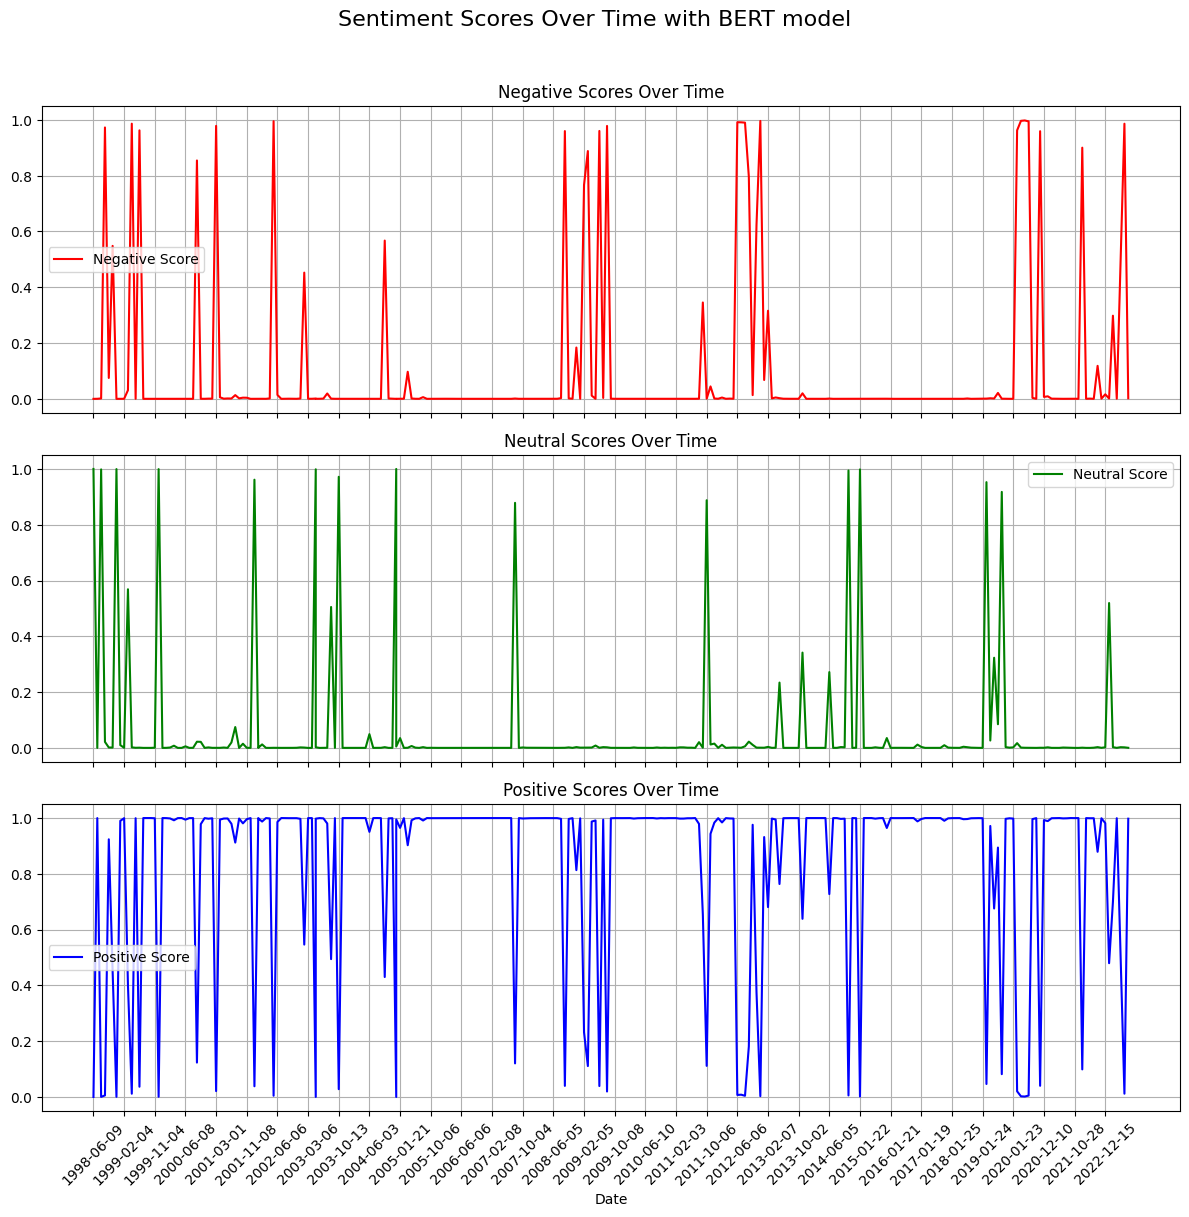

In [19]:
import matplotlib.pyplot as plt

# Assuming df_ecb_sentiment_score is your DataFrame
# Transform columns into lists
negative_scores = df_ecb_sentiment_score['negative_score'].tolist()
neutral_scores = df_ecb_sentiment_score['neutral_score'].tolist()
positive_scores = df_ecb_sentiment_score['positive_score'].tolist()

# Create a list of indices (assuming the DataFrame index is suitable)
date = df_ecb_sentiment_score['date'].tolist()

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True, sharey=True)

# Plot negative scores
axs[0].plot(date, negative_scores, label='Negative Score', color='r')
axs[0].set_title('Negative Scores Over Time')
axs[0].legend()
axs[0].grid(True)

# Plot neutral scores
axs[1].plot(date, neutral_scores, label='Neutral Score', color='g')
axs[1].set_title('Neutral Scores Over Time')
axs[1].legend()
axs[1].grid(True)

# Plot positive scores
axs[2].plot(date, positive_scores, label='Positive Score', color='b')
axs[2].set_title('Positive Scores Over Time')
axs[2].legend()
axs[2].grid(True)

# Set common labels
fig.suptitle('Sentiment Scores Over Time with BERT model', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.96])  # Adjust layout to accommodate suptitle

# Rotate x-axis labels by 45 degrees and display every third date
for ax in axs:
    ax.set_xticks(ax.get_xticks()[::2])  # Display every third tick
    ax.tick_params(axis='x', rotation=45)

plt.xlabel('Date')

# Display the plot
plt.show()
